# Compare NiMARE null methods using ALE

In [1]:
%matplotlib inline
import os
# Limit to one CPU
os.environ["OMP_NUM_THREADS"] = "1" # export OMP_NUM_THREADS=1
os.environ["OPENBLAS_NUM_THREADS"] = "1" # export OPENBLAS_NUM_THREADS=1
os.environ["MKL_NUM_THREADS"] = "1" # export MKL_NUM_THREADS=1
os.environ["VECLIB_MAXIMUM_THREADS"] = "1" # export VECLIB_MAXIMUM_THREADS=1
os.environ["NUMEXPR_NUM_THREADS"] = "1" # export NUMEXPR_NUM_THREADS=1

from collections import Counter

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nilearn.plotting import plot_stat_map

import nimare

In [2]:
f = "/Users/taylor/Downloads/foci.txt"
dset = nimare.io.convert_sleuth_to_dataset(f)

In [3]:
meta_ana = nimare.meta.cbma.ALE(null_method="analytic")
meta_full = nimare.meta.cbma.ALE(null_method="empirical", n_iters=1000, n_cores=1)
meta_red = nimare.meta.cbma.ALE(null_method="reduced_empirical", n_iters=100000, n_cores=1)

In [4]:
%%time
res_ana = meta_ana.fit(dset)

CPU times: user 3.03 s, sys: 537 ms, total: 3.57 s
Wall time: 3.28 s


In [84]:
%%time
res_red = meta_red.fit(dset)

CPU times: user 7.65 s, sys: 376 ms, total: 8.02 s
Wall time: 8.06 s


In [6]:
%%time
res_full = meta_full.fit(dset)

  0%|          | 0/1000 [00:00<?, ?it/s]

CPU times: user 4min 56s, sys: 3min 14s, total: 8min 11s
Wall time: 8min 15s


<ipython-input-85-3db539aa6c39>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


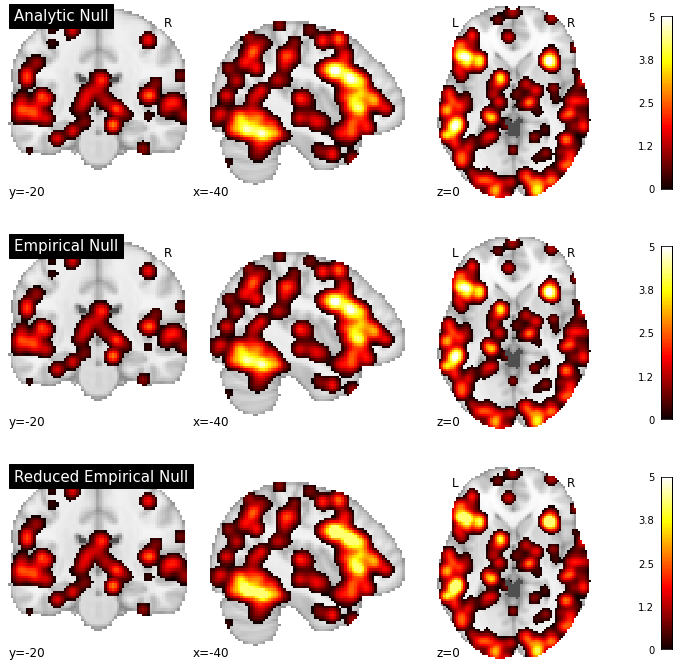

In [85]:
fig, axes = plt.subplots(figsize=(12, 12), nrows=3)
plot_stat_map(
    res_ana.get_map("z"), axes=axes[0], title="Analytic Null", 
    vmax=5, cut_coords=[-40, -20, 0], draw_cross=False,
)
plot_stat_map(
    res_full.get_map("z"), axes=axes[1], title="Empirical Null", 
    vmax=5, cut_coords=[-40, -20, 0], draw_cross=False,
)
plot_stat_map(
    res_red.get_map("z"), axes=axes[2], title="Reduced Empirical Null", 
    vmax=5, cut_coords=[-40, -20, 0], draw_cross=False,
)
fig.show()

<ipython-input-86-448ae6e27771>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


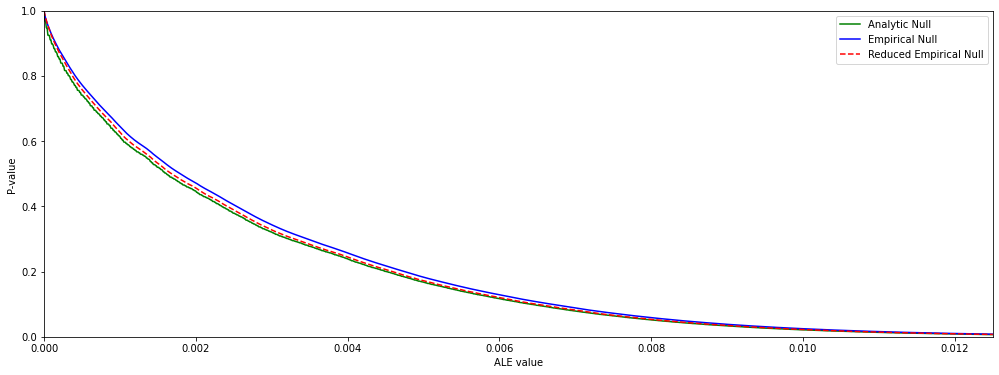

In [86]:
fig, ax = plt.subplots(figsize=(17, 6))
hist_bins = meta_ana.null_distributions_["histogram_bins"]
null_dist = np.cumsum(meta_ana.null_distributions_["histweights_corr-none_method-analytic"][::-1])[::-1]
null_dist = null_dist / np.max(null_dist)
ax.plot(hist_bins, null_dist, color='green', label="Analytic Null")

hist_bins = meta_full.null_distributions_["histogram_bins"]
null_dist = np.cumsum(meta_full.null_distributions_["histweights_corr-none_method-empirical"][::-1])[::-1]
null_dist = null_dist / np.max(null_dist)
ax.plot(hist_bins, null_dist, color='blue', label="Empirical Null")

svals = sorted(meta_red.null_distributions_["values_corr-none_method-reducedEmpirical"])
counter = Counter(svals)
values = np.asarray(list(counter.keys()))
counts = np.asarray(list(counter.values()))
null_dist = np.cumsum(counts[::-1])[::-1]
null_dist = null_dist / np.max(null_dist)
ax.plot(values, null_dist, color='red', linestyle='--', label="Reduced Empirical Null")

ax.set_xlim(0, 0.0125)
leg = ax.legend()
ax.set_xlabel("ALE value")
ax.set_ylabel("P-value")
ax.set_ylim(0, 1.)
fig.show()

In [67]:
print('There are {} studies in the dataset.'.format(len(dset.ids)))

There are 50 studies in the dataset.


<ipython-input-74-557b2e4c17d4>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


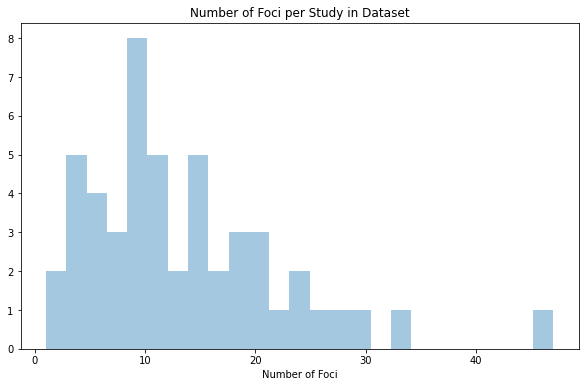

In [74]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(
    dset.coordinates.groupby("id").count()["study_id"].values, 
    bins=25, ax=ax, norm_hist=False, kde=False
)
ax.set_title("Number of Foci per Study in Dataset")
ax.set_xlabel("Number of Foci")
fig.show()